In [ ]:
# data processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# cross validation
from sklearn.model_selection import train_test_split

# import svm model
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# model optimization
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Data Loading

In [ ]:
Bank_data = pd.read_csv('/content/drive/MyDrive/svm 781/Churn_Modelling_2.csv')
Bank_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
Bank_data.shape

(10000, 14)

**Data Cleansing**

In [ ]:
# print the names of the features and label (`Exited`)
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Feature Engineering**

In [ ]:
# check unique values to define which one is unused and must be on category type
Bank_data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
# drop unused column
Bank_data = Bank_data.drop(['CustomerId', 'RowNumber', 'Surname'], axis=1)
Bank_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# change into category type
cat_cols = ['Geography', 'Gender']
Bank_data[cat_cols] = Bank_data[cat_cols].astype('category')
Bank_data.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object

In [ ]:
Bank_data['Geography'].cat.categories

Index(['France', 'Germany', 'Spain'], dtype='object')

In [ ]:
Bank_data['Gender'].cat.categories

Index(['Female', 'Male'], dtype='object')

**Check Missing Values & Duplicates**



In [ ]:
Bank_data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
Bank_data.duplicated().sum()

0

In [ ]:
Bank_data.describe()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
Bank_data.describe(include='category')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


**Check Variable Target Distribution**

<Axes: >

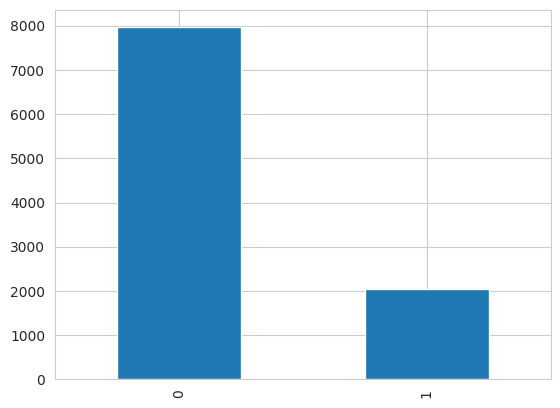

In [ ]:
Bank_data['Exited'].value_counts().plot(kind='bar')

The target variable Exited has two values, namely 0 and 1

* 0 means that the customer will not leave the bank.
* 1 means the customer is likely to leave the bank.

**Check Outliers using Z-Score**

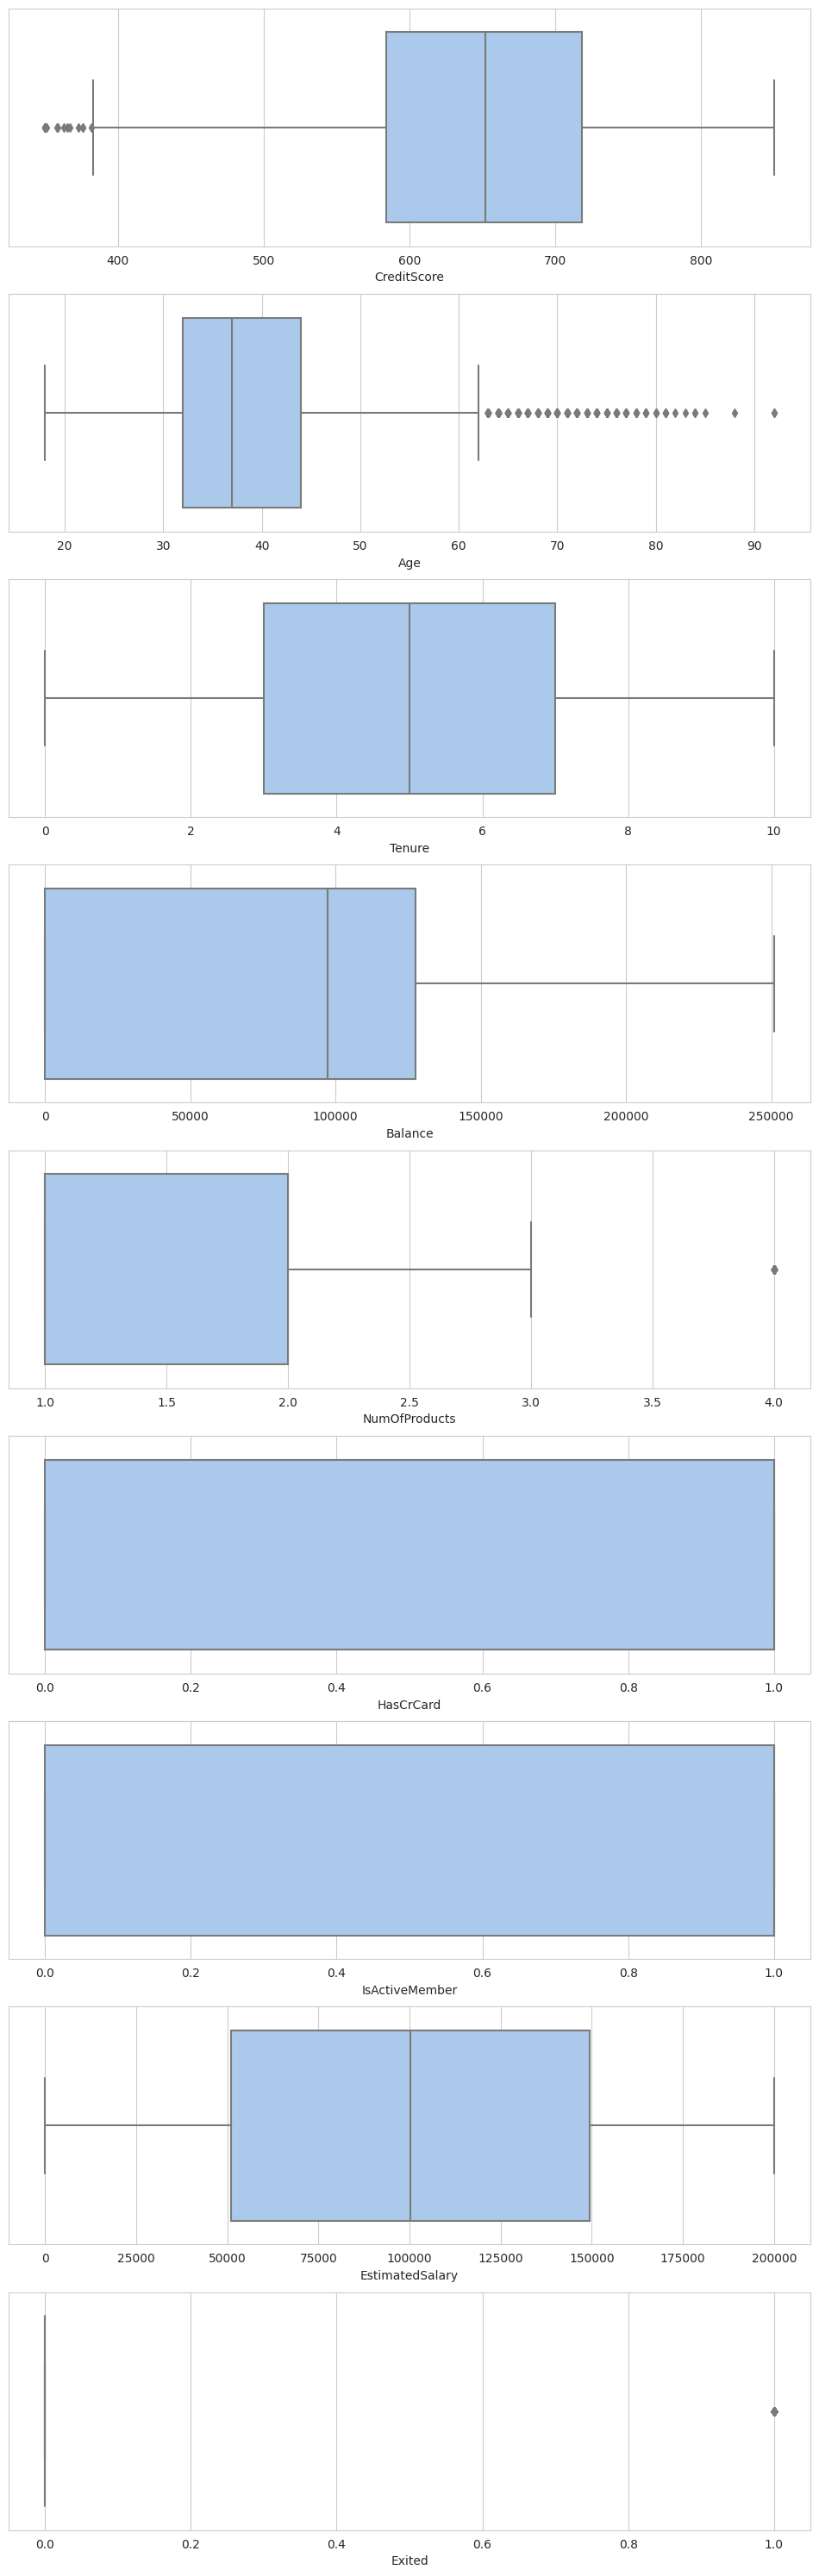

In [ ]:
num_cols = list(Bank_data.columns)
for x in cat_cols:
    num_cols.remove(x)
# check outlier
fig, ax = plt.subplots(ncols=1, nrows=9, figsize=(12, 38))

i = 0
for col in num_cols:
    sns.boxplot(data=Bank_data, x=col, ax=ax[i], palette='pastel')
    i = i+1


In [ ]:
def detect_outlier(data):
    outliers = []
    threshold = 4
    mean = np.mean(data)
    std = np.std(data)

    for y in data:
        z_score= (y - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
for item in num_cols:
    mean = np.mean(Bank_data[f'{item}'])
    print(f'Outliers {item} : {mean}')
    outliers = detect_outlier(Bank_data[f'{item}'])
    if outliers: print(outliers)

Outliers CreditScore : 650.5288
[359, 350, 350, 358, 351, 350, 350, 350]
Outliers Age : 38.9218
[75, 73, 72, 79, 80, 75, 72, 82, 74, 71, 72, 74, 76, 71, 73, 77, 74, 74, 74, 74, 74, 72, 77, 74, 88, 71, 72, 71, 75, 73, 76, 85, 74, 76, 72, 71, 74, 72, 72, 84, 71, 74, 84, 77, 79, 76, 73, 73, 76, 72, 71, 80, 74, 76, 75, 77, 74, 71, 75, 78, 74, 71, 77, 79, 81, 79, 71, 72, 71, 72, 72, 78, 75, 71, 73, 71, 71, 76, 73, 75, 73, 71, 72, 73, 92, 75, 71, 77, 92, 72, 71, 76, 72, 77, 74, 72, 73, 77, 71, 72, 81, 76, 74, 71, 76, 72, 81, 73, 71, 75, 71, 71, 71, 73, 72, 71, 81, 73, 74, 83, 71, 78, 72, 74, 80, 72, 76, 71, 71, 78, 78, 77, 77]
Outliers Tenure : 5.0128
Outliers Balance : 76485.889288
Outliers NumOfProducts : 1.5302
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Outliers HasCrCard : 0.7055
Outliers IsActiveMember : 0.5151
Outliers EstimatedSalary : 100090.239881

In [ ]:
Bank_data[Bank_data['NumOfProducts'] == 4].head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
70,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
1254,628,France,Female,46,1,46870.43,4,1,0,31272.14,1
1469,819,Germany,Female,49,1,120656.86,4,0,0,166164.30,1
1488,596,Spain,Male,30,6,121345.88,4,1,0,41921.75,1


**One-Hot Encoding**
One-hot encoding is a process used to represent categorical variables as numerical data. It is often used in machine learning algorithms to represent categorical data in a way that can be input into a model.

In [ ]:
Bank_data = pd.get_dummies(Bank_data, columns = cat_cols)
Bank_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


**Correlation of Predictor Variables with Target Variables**



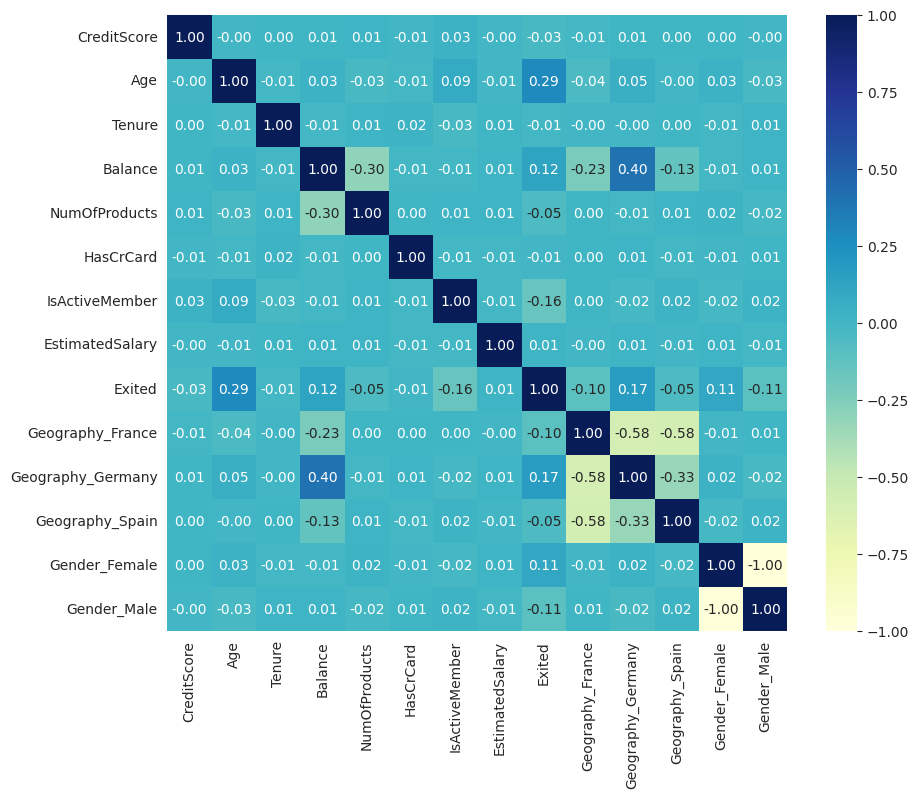

In [ ]:
corr = Bank_data.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()

<Axes: >

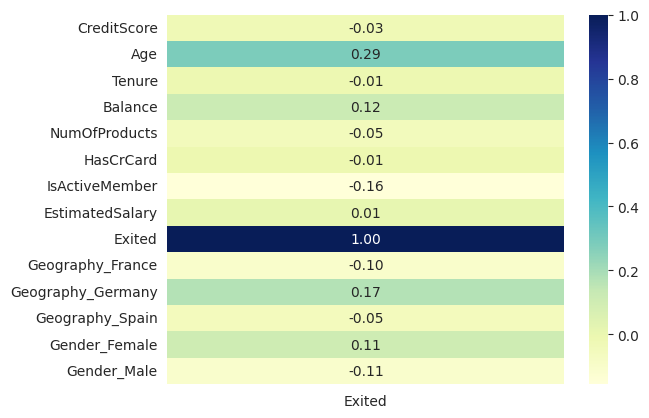

In [ ]:
churn_corr = corr[['Exited']]
sns.heatmap(churn_corr, annot=True,  fmt=".2f", cmap='YlGnBu')

In [ ]:
high_corr = churn_corr[abs(churn_corr['Exited']) >= 0.2]
high_corr.sort_values(by='Exited', ascending=False)

,Exited
Exited,1.000000
Age,0.285323
Geography_Germany,0.173488
Balance,0.118533
Gender_Female,0.106512
Geography_France,-0.104955
Gender_Male,-0.106512
IsActiveMember,-0.156128


In [ ]:
high_corr_columns = list(high_corr.index)
high_corr_columns.remove('Exited')

Visualize Data

<Axes: xlabel='Age', ylabel='Count'>

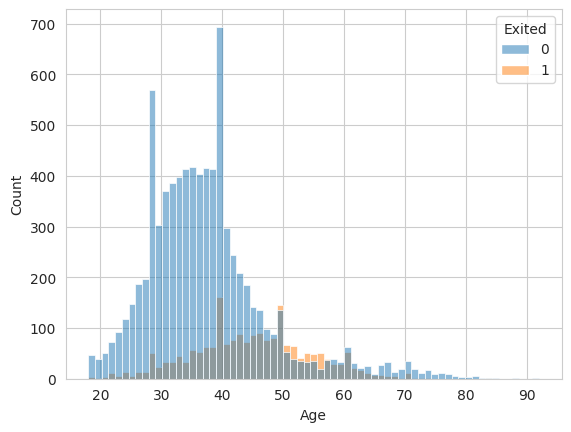

In [ ]:
# check age distribution
sns.histplot(Bank_data, x='Age', hue='Exited')

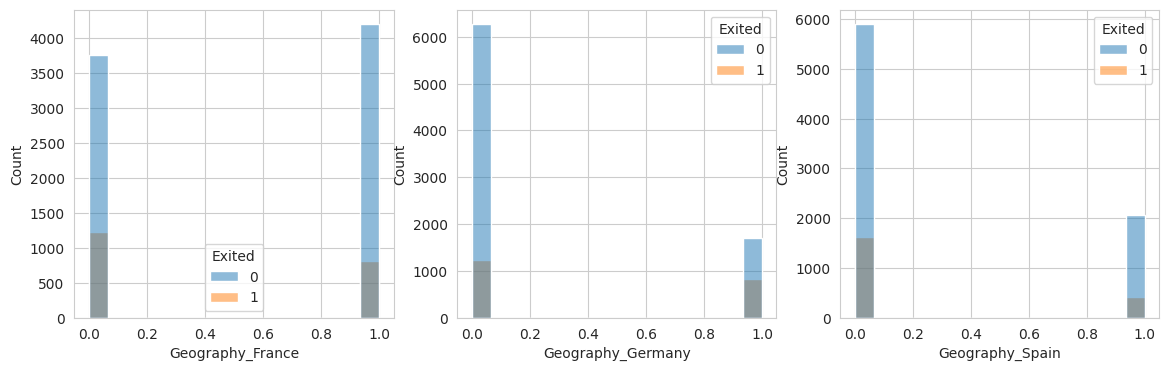

In [ ]:
# check geography distribution
fig, ax = plt.subplots(ncols=3, figsize=(14, 4))
idx = 0
for col in Bank_data.columns:
    if 'Geography' in col:
        sns.histplot(Bank_data, x=col, hue='Exited', ax=ax[idx])
        idx += 1

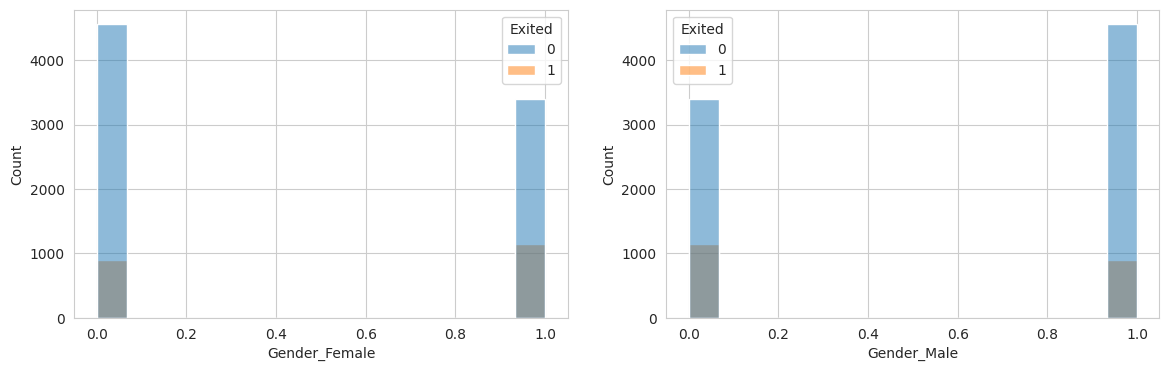

In [ ]:
# check geography distribution
fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
idx = 0
for col in Bank_data.columns:
    if 'Gender' in col:
        sns.histplot(Bank_data, x=col, hue='Exited', ax=ax[idx])
        idx += 1

<Axes: xlabel='Balance', ylabel='Count'>

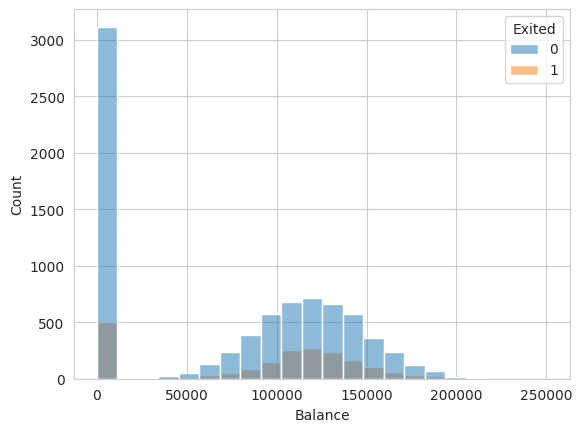

In [ ]:
# check balance distribution
sns.histplot(Bank_data, x='Balance', hue='Exited')

<Axes: xlabel='IsActiveMember', ylabel='Count'>

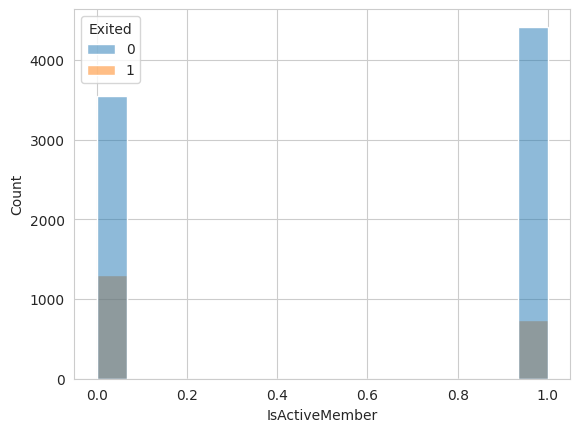

In [ ]:
# check IsActiveMember distribution
sns.histplot(Bank_data, x='IsActiveMember', hue='Exited')

**Split Train-Test Data**


In [ ]:
df = Bank_data.copy()
X_raw = df.drop(columns=['Exited'])

X = X_raw.values
y = df['Exited'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:
print('Train - X:', X_train.shape, ' y:', y_train.shape)
print('Test - X:', X_test.shape, ' y:', y_test.shape)

Train - X: (8000, 13)  y: (8000,)
Test - X: (2000, 13)  y: (2000,)


**Standardization Data**

In [ ]:
# in this case we know that range each columns is different
pd.DataFrame({
    'columns': Bank_data.columns,
    'min': list(Bank_data.min()),
    'max': list(Bank_data.max())
}).sort_values(by='min')

,columns,min,max
2,Tenure,0.00,10.00
3,Balance,0.00,250898.09
5,HasCrCard,0.00,1.00
6,IsActiveMember,0.00,1.00
8,Exited,0.00,1.00
9,Geography_France,0.00,1.00
10,Geography_Germany,0.00,1.00
11,Geography_Spain,0.00,1.00
12,Gender_Female,0.00,1.00
13,Gender_Male,0.00,1.00


In [ ]:
# because of that we need to try scaled this data
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

**Support Vector Machine**

In [ ]:
# create a svm Classifier
svc = svm.SVC(kernel='linear') # linear kernel

# train the model using train dataset
svc.fit(X_train, y_train)

# predict the churn for test dataset
y_pred = svc.predict(X_test)

In [ ]:
# model accuracy
svc_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Train:", metrics.accuracy_score(y_train, svc.predict(X_train)))
print("Accuracy Test:", svc_acc)

Accuracy Train: 0.779125
Accuracy Test: 0.7925


In [ ]:
# create a svm Classifier
svc_ss = svm.SVC(kernel='linear') # linear kernel

# train the model using the train data
svc_ss.fit(X_train_ss, y_train)

# predict the churn for test dataset
y_pred_ss = svc_ss.predict(X_test_ss)

In [ ]:
# model accuracy
svc_ss_acc = metrics.accuracy_score(y_test, y_pred_ss)
print("The Model Trained with Scaled Data")
print("Accuracy Train:", metrics.accuracy_score(y_train, svc_ss.predict(X_train)))
print("Accuracy Test", svc_ss_acc)

The Model Trained with Scaled Data
Accuracy Train: 0.70375
Accuracy Test 0.8035


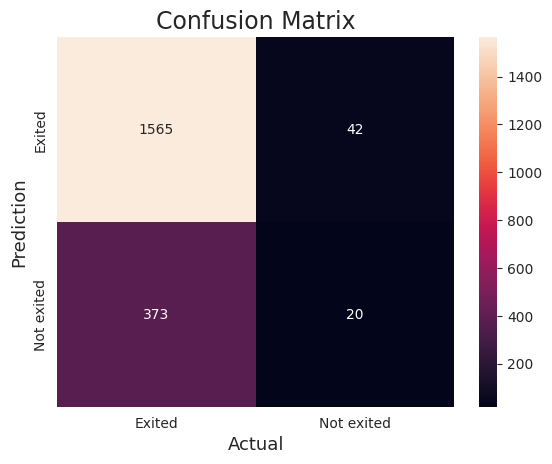

Accuracy : 0.7925
Precision : 0.3225806451612903
Recall : 0.05089058524173028
F1-score : 0.0879120879120879


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=['Exited', 'Not exited'],
			yticklabels=['Exited', 'Not exited'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score :", F1_score)